# IDS 575 - Machine Learning and Statistical Analysis Final Project
Group 15 - Anindita Mitra, Anisha Vijayan, Murtaza Agha, Yu Ting Sun

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import norm, probplot
from copy import copy
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from IPython import get_ipython
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IDS575 - Group 15/Project/Dataset/OnlineNewsPopularity.csv')

## Data Cleaning and EDA

In [ ]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
data.shape

(39644, 61)

In [ ]:
# Checking for null values
data.isna().sum().sort_values(ascending = False)

url                           0
 weekday_is_monday            0
 weekday_is_wednesday         0
 weekday_is_thursday          0
 weekday_is_friday            0
                             ..
 kw_min_avg                   0
 kw_max_avg                   0
 kw_avg_avg                   0
 self_reference_min_shares    0
 shares                       0
Length: 61, dtype: int64

There are no null values in the columns.

In [ ]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

There are spaces in the column names so we shall remove those.

In [ ]:
data.columns = data.columns.str.replace(" ", "")

In [ ]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [ ]:
# Exploring the target variable 
data['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

The class value shares is continuous valued. We transformed the task into a binary task using a decision threshold of 1400 which is the 50th percentile. 

In [ ]:
# Article with the min shares
data[data['shares'] == min(data['shares'])]['url']

17266    http://mashable.com/2013/12/09/wand-remote-con...
Name: url, dtype: object

In [ ]:
# Article with the max shares
data[data['shares'] == max(data['shares'])]['url']

9365    http://mashable.com/2013/07/03/low-cost-iphone/
Name: url, dtype: object

In [ ]:
# Encode the label by threshold 1400
label_encoder = preprocessing.LabelEncoder()
is_popular = pd.Series(label_encoder.fit_transform(data[data.keys()[-1]] >= 1400))

In [ ]:
data = data.merge(is_popular.rename('is_popular'), left_index=True, right_index=True)

In [ ]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,is_popular
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


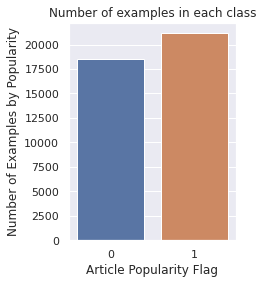

In [ ]:
# Number of examples in each class
sns.set(rc={'figure.figsize':(3,4)})
ax = sns.countplot(is_popular)
ax.set(xlabel='Article Popularity Flag', ylabel='Number of Examples by Popularity')
plt.title('Number of examples in each class')
plt.show()

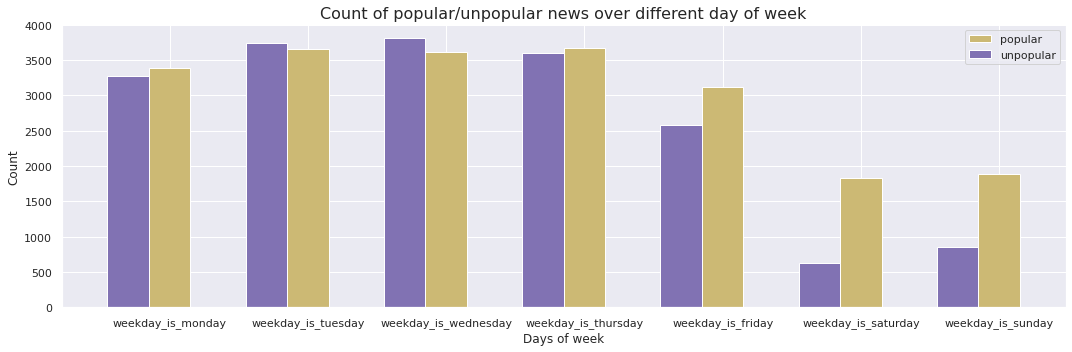

In [ ]:
# Visualize the feature of different day of week
columns_day = data.columns.values[31:38]
unpop = data[data['shares']<1400]
pop = data[data['shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

get_ipython().run_line_magic('matplotlib', 'inline')

fig = plt.figure(figsize = (15,5))
plt.title("Count of popular/unpopular news over different day of week", fontsize = 16)
plt.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'y', \
          label = "popular")
plt.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'm', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("days.pdf")
plt.show()  

It seems that the popular articles are posted usually on the weekdays rather than the weekends. 

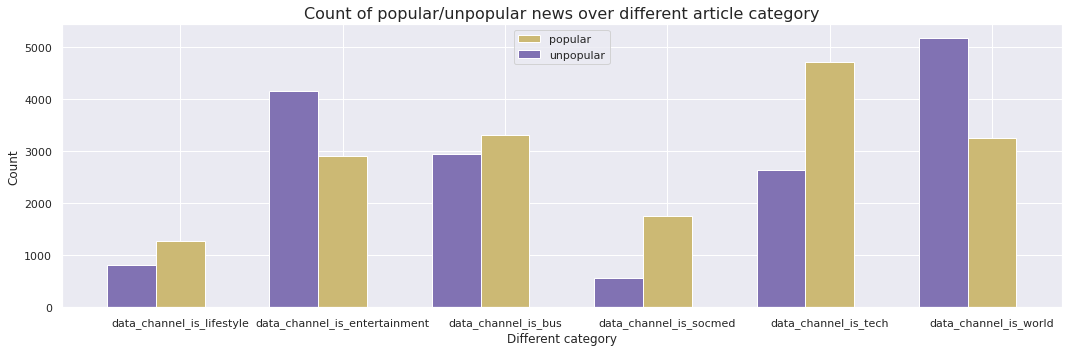

In [ ]:
# Visualize the feature of different article category
columns_chan= data.columns.values[13:19]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = plt.figure(figsize = (15,5))
plt.title("Count of popular/unpopular news over different article category", fontsize = 16)
plt.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'y', \
          label = "popular")
plt.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'm', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_chan)), columns_chan)

plt.ylabel("Count", fontsize = 12)
plt.xlabel("Different category", fontsize = 12)
    
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.savefig("chan.pdf")
plt.show() 

The above graph tells us that the Social media and Technology articles are more popular than other categories.

In [ ]:
# n_tokens_content: Number of words in the content 
# Checking for rows that contain 0 for n_tokens_content
num_of_nowords= data[data['n_tokens_content']==0].index
print('number of news items with no words :', num_of_nowords.size)

number of news items with no words : 1181


In [ ]:
# Dropping examples with no words in the content
data = data[data['n_tokens_content'] != 0]

In [ ]:
# n_tokens_title: Number of words in the title
# Checking for rows that contain 0 for n_tokens_title
num_of_nowords_title= data[data['n_tokens_title']==0].index
print('number of news items with no words', num_of_nowords_title.size)

number of news items with no words 0


In [ ]:
#n_non_stop_words: Rate of non-stop words in the content
#Exploring the n_non_stop_words which is the Rate of non-stop words in the content
data['n_non_stop_words'].describe()

count    38463.000000
mean         1.027065
std          5.307978
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64

There is just one record where the value of this column is 1042. All other instances have values between 0 and 1, so this clearly is an outlier and needs to be removed.

In [ ]:
data = data[data['n_non_stop_words'] != 1042]

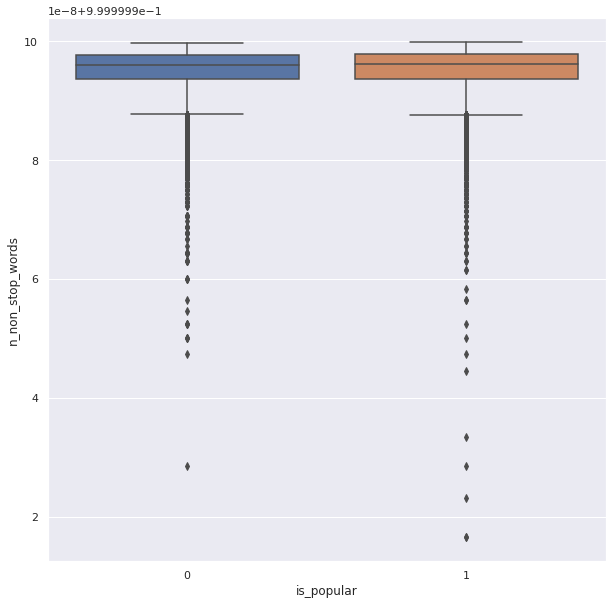

In [ ]:
# boxplot for the n_non_stop_unique_tokens and is_popular
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(x='is_popular', y='n_non_stop_words', data=data, ax=axes)

Most of the data are between 8 and 10 for both classes and don't really offer any uniqueness and so can be removed.

In [ ]:
#n_non_stop_unique_tokens: Rate of unique non-stop words in the content
#Exploring n_non_stop_unique_tokens
data['n_non_stop_unique_tokens'].describe()

count    38462.000000
mean         0.693455
std          0.100644
min          0.119134
25%          0.632588
50%          0.693727
75%          0.756944
max          1.000000
Name: n_non_stop_unique_tokens, dtype: float64

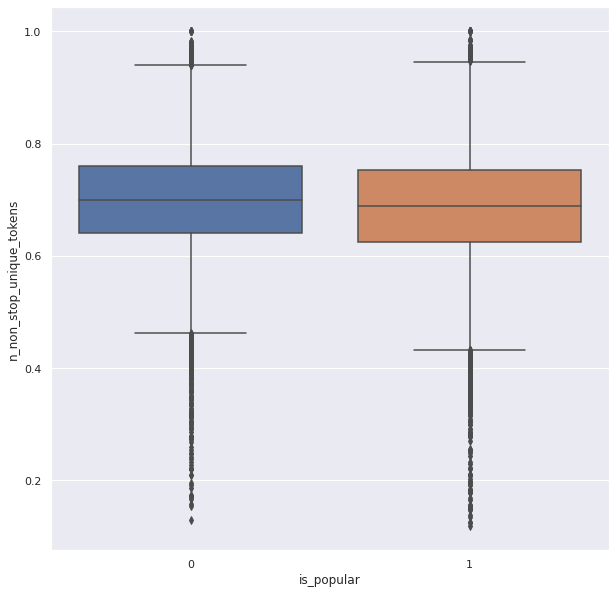

In [ ]:
# boxplot for the n_non_stop_unique_tokens and is_popular
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(x='is_popular', y='n_non_stop_unique_tokens', data=data, ax=axes)

Most of the data are between 0.6 and 0.8 for both the classes, so they don't really offer any uniqueness and so can be removed.

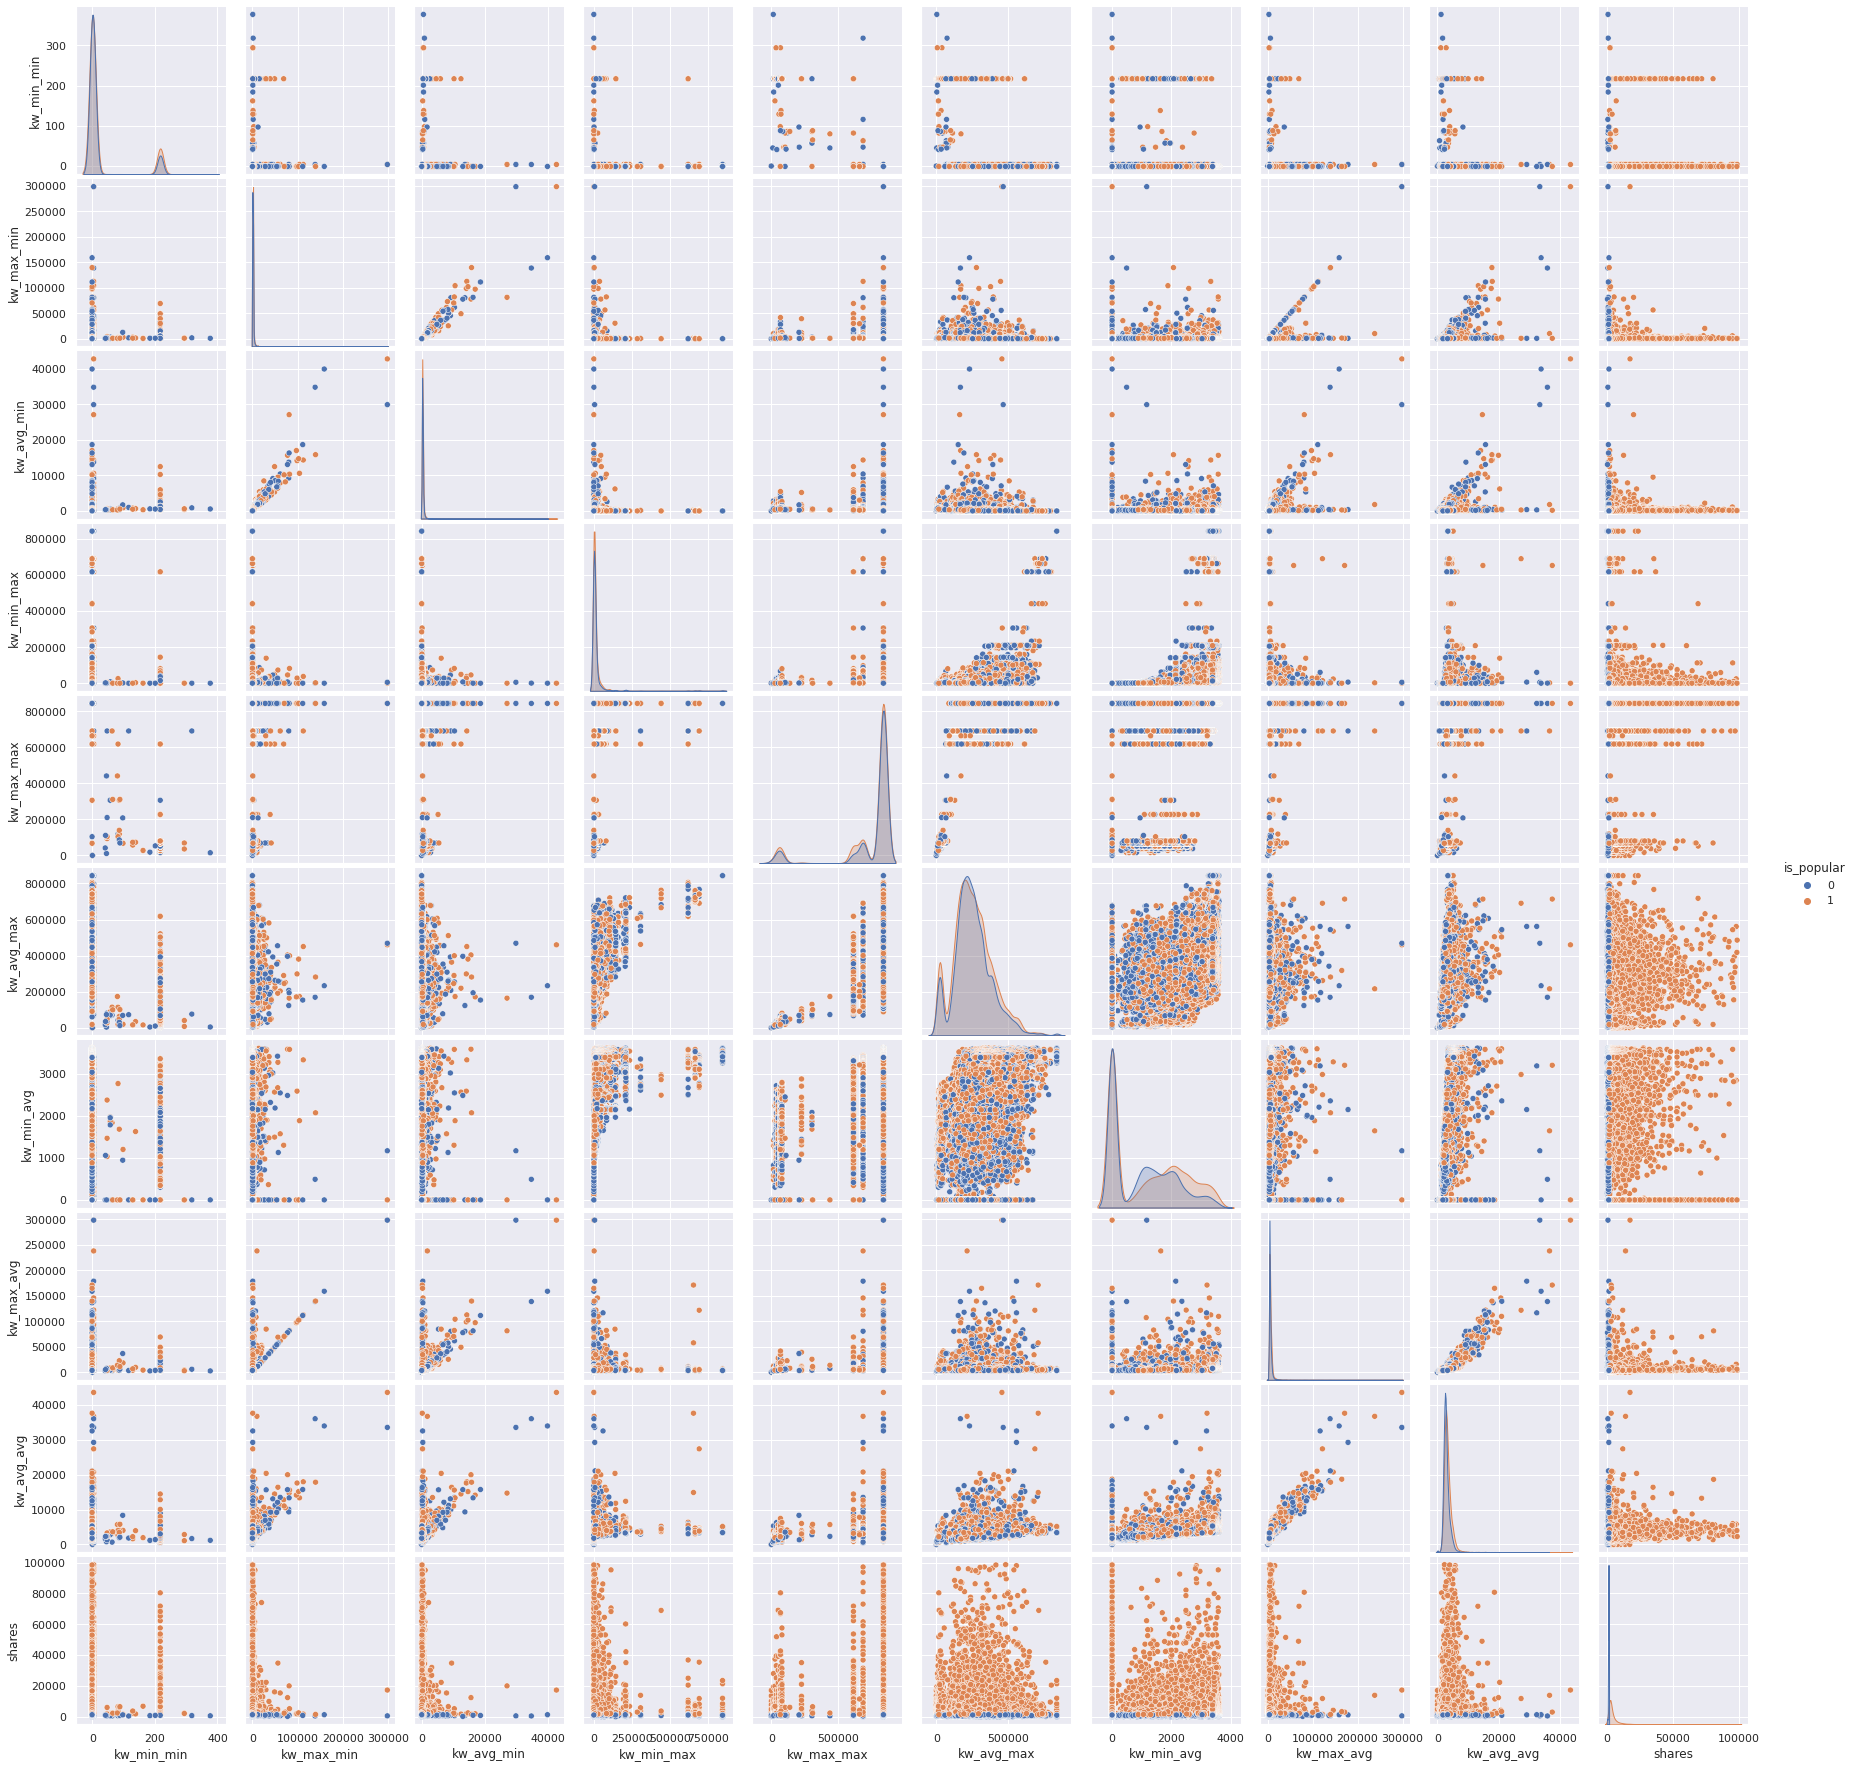

In [ ]:
#kw_min_min and related kw_terms
temp_data = data[data['shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = ['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 
            'kw_max_avg', 'kw_avg_avg', 'shares']
sns.pairplot(temp_data, vars=kw_cols, hue='is_popular', diag_kind='kde')

We can see a lot of correlations from the above plot and can also see that the data is skewed. This will be handled in the later steps.

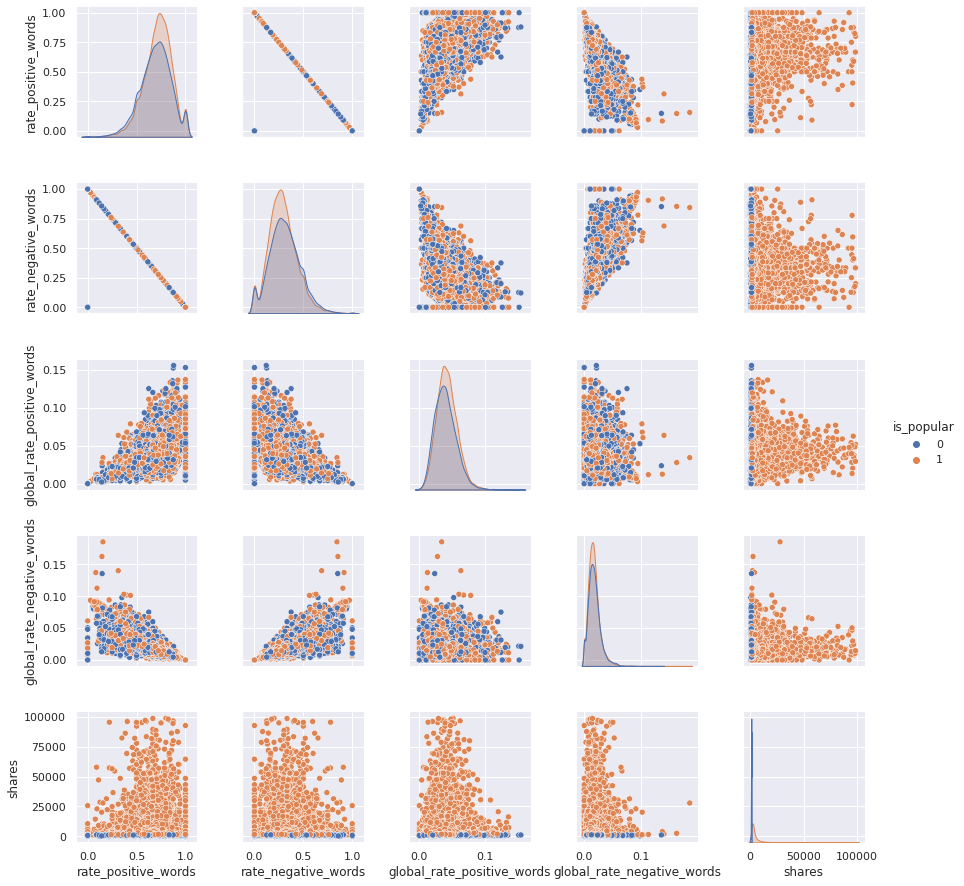

In [ ]:
#Finding relationship between 'rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', and 'shares'
temp_data = data[data['shares'] <= 100000]
# running a pair plot for the these terms
kw_cols = ['rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', 'shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='is_popular', diag_kind='kde')

There is a linear relationship between rate_positive_words and rate_negative_words but no special relationship with the target variable.

global_rate_positive_words and global_rate_negative_words show slight relationship with shares.

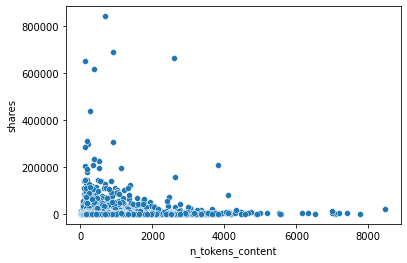

In [ ]:
#n_tokens_content
sns.scatterplot(x='n_tokens_content',y='shares', data=data)

From the above scatterplot, it can be seen than good articles will generally tend to have n_tokens_content less than 2000 and greater than 100 words

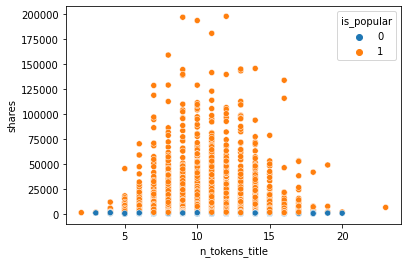

In [ ]:
#n_tokens_title
temp_data = data[data['shares'] <= 200000]
sns.scatterplot(x='n_tokens_title',y='shares', hue='is_popular', data=temp_data)

From the above scatterplot, it can be seen than good articles will generally tend to have n_tokens_title between 6 and 17 words

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


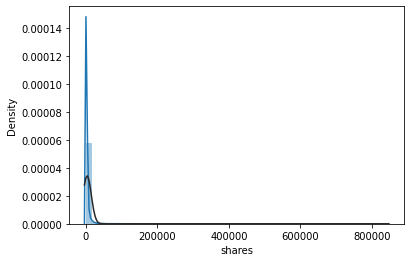

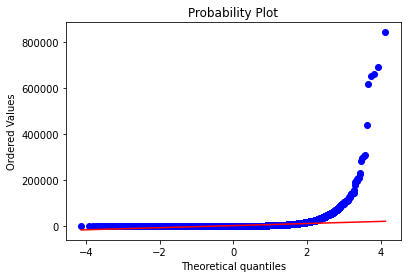

In [ ]:
# Exploring the target variable
#histogram and normal probability plot
temp_data = data[data['shares'] <= 100000]
fig,ax = plt.subplots(figsize=(6,4))
sns.distplot(data['shares'], fit=norm);
fig = plt.figure()
res = probplot(data['shares'], plot=plt)

From the above graphs, we can see that the target variable 'shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line. We can do log transfromation to make it a normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


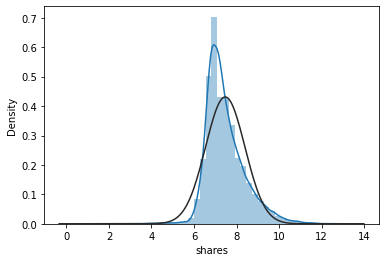

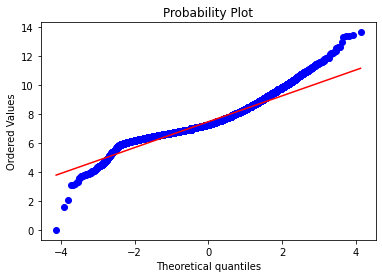

In [ ]:
# Applying log transformation

# making a copy of the data
new_shares_data = copy(data)

# log transformation
new_shares_data.loc[new_shares_data['shares'] > 0, 'shares'] = np.log(data.loc[data['shares'] > 0, 'shares'])
new_shares_log = new_shares_data['shares']

#transformed histogram and normal probability plot
fig,ax = plt.subplots(figsize=(6,4))
sns.distplot(new_shares_log, fit=norm);
fig = plt.figure()
res = probplot(new_shares_log, plot=plt)

Now the shares column have a normal distribution and it also follows the diagonal line.

In [ ]:
# Removing non-predictive columns (url and timedelta)and other columns from our above analysis
new_shares_data = new_shares_data.drop(labels=['url', 'timedelta', 'n_non_stop_unique_tokens', 'n_non_stop_words'], axis = 1)
new_shares_data.head(n=4)

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,is_popular
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,6.385194,0
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,6.566672,0
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,7.313220,1
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,7.090077,0


In [ ]:
#dataframe with numerical features
data_num_cols = new_shares_data.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world", "is_popular"],axis=1)

#dataframe contains catagorical features.
data_cat_cols = new_shares_data[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world", "is_popular"]]

In [ ]:
# Drop target variable 
data_num_cols = data_num_cols.drop('shares',axis=1)

In [ ]:
# note log transformation can only be performed on data without zero value
for col in data_num_cols.columns:
    #applying log transformation
    temp = data_num_cols[data_num_cols[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        data_num_cols[col] = np.log(data_num_cols[col])
        print (col)
    else:
        # attempt to only transform the positive values alone
        data_num_cols.loc[data_num_cols[col] > 0, col] = np.log(data_num_cols.loc[data_num_cols[col] > 0, col])

n_tokens_title
n_tokens_content
n_unique_tokens
average_token_length
num_keywords
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04


In [ ]:
data_num_cols.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,2.484907,5.389072,-0.410084,1.386294,0.693147,0.000000,0.0,1.543376,1.609438,0.0,...,-0.971179,-2.302585,-0.356675,-0.350000,-0.600,-0.200000,-0.693147,-0.18750,0.000000,-1.673976
1,2.197225,5.541264,-0.502952,1.098612,0.000000,0.000000,0.0,1.592032,1.386294,0.0,...,-1.248571,-3.401197,-0.356675,-0.118750,-0.125,-0.100000,0.000000,0.00000,-0.693147,0.000000
2,2.197225,5.351858,-0.553160,1.098612,0.000000,0.000000,0.0,1.480095,1.791759,0.0,...,-0.701515,-2.302585,0.000000,-0.466667,-0.800,-0.133333,0.000000,0.00000,-0.693147,0.000000
3,2.197225,6.274762,-0.685600,2.197225,0.000000,0.000000,0.0,1.482717,1.945910,0.0,...,-0.952008,-1.992430,-0.223144,-0.369697,-0.600,-0.166667,0.000000,0.00000,-0.693147,0.000000
4,2.564949,6.977281,-0.877922,2.944439,2.944439,2.995732,0.0,1.543904,1.945910,0.0,...,-0.888852,-3.401197,0.000000,-0.220192,-0.500,-0.050000,-0.788457,-1.99243,-3.091042,-1.992430


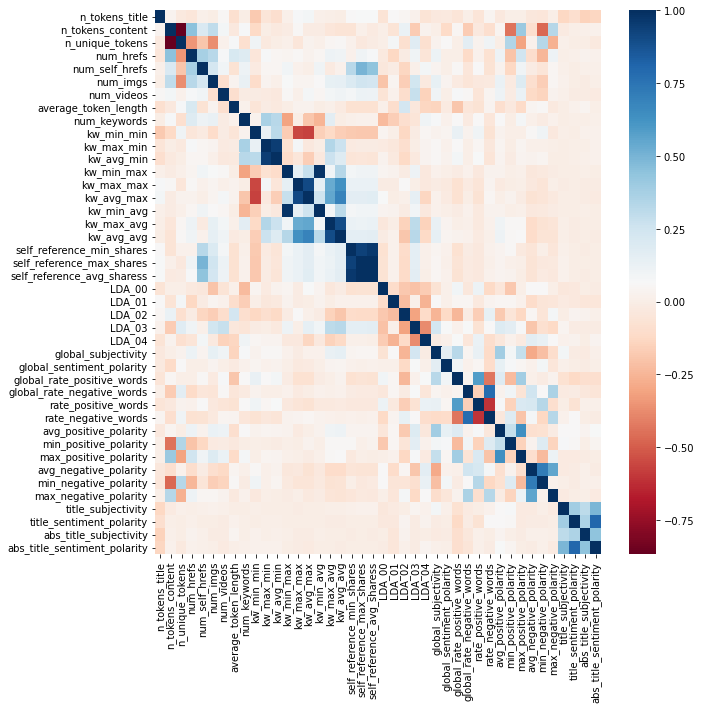

<Figure size 432x288 with 0 Axes>

In [ ]:
# Checking for correlations
corr = data_num_cols.corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap="RdBu")
fig = plt.figure()

In [ ]:
data_num_cols.drop(['self_reference_avg_sharess'], axis=1, inplace=True)
data_num_cols.drop(['avg_negative_polarity'], axis=1, inplace=True)
data_num_cols.drop(['avg_positive_polarity'], axis=1, inplace=True)
data_num_cols.drop(['kw_avg_min'], axis=1, inplace=True)

In [ ]:
data_num_cols.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [ ]:
data_num_cols.shape

(38462, 38)

In [ ]:
type(data_num_cols)

pandas.core.frame.DataFrame

For Categorical column analysis, we have done the Chi-square test.

In [ ]:
# Chi square test for the categorical variables
def get_chi_sq(row, column, df):  

    # plot the graph for the data passed
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.countplot(data=df, x=row, hue=column)  
    plt.xlabel(row)
    plt.ylabel('Count')
    plt.show()
    # doing this to keep from opening too many figs at once (eats memory)
    plt.close(fig);
      
    # create cross-tabulation
    xtab = pd.crosstab(df[row], df[column], margins = False)   
    print('observed data:\n', xtab)
    
    # Chi-square contingency table
    chi2, p_value, dof, expected = chi2_contingency(xtab, correction = False)
    print('expected data:\n', expected)
    print('chi-squared value: {:.4f} for {:.0f} dof; p-value = {:.4f}\n'.format(chi2, dof, p_value))
    
    return

In [ ]:
data_cat_cols.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'is_popular'],
      dtype='object')

In [ ]:
data_normal = pd.concat([data_num_cols,data_cat_cols],axis=1)

In [ ]:
data_normal.shape

(38462, 53)

In [ ]:
data_normal['is_popular'].unique()

array([0, 1])

In [ ]:
data_normal.shape

(38462, 53)

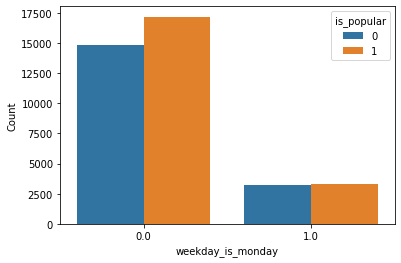

observed data:
 is_popular             0      1
weekday_is_monday              
0.0                14810  17181
1.0                 3189   3282
expected data:
 [[14970.77658468 17020.22341532]
 [ 3028.22341532  3442.77658468]]
chi-squared value: 19.2896 for 1 dof; p-value = 0.0000



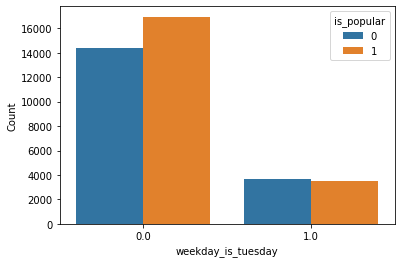

observed data:
 is_popular              0      1
weekday_is_tuesday              
0.0                 14350  16942
1.0                  3649   3521
expected data:
 [[14643.666684 16648.333316]
 [ 3355.333316  3814.666684]]
chi-squared value: 59.3793 for 1 dof; p-value = 0.0000



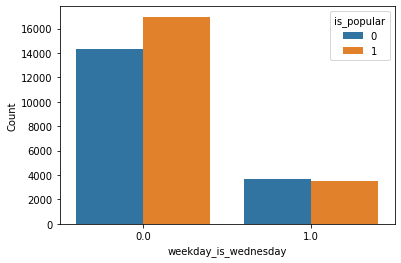

observed data:
 is_popular                0      1
weekday_is_wednesday              
0.0                   14292  16965
1.0                    3707   3498
expected data:
 [[14627.28779055 16629.71220945]
 [ 3371.71220945  3833.28779055]]
chi-squared value: 77.1138 for 1 dof; p-value = 0.0000



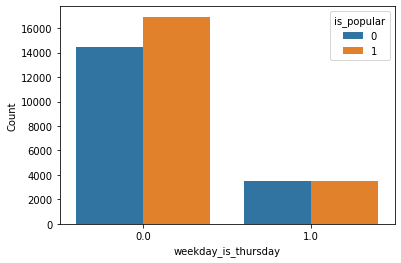

observed data:
 is_popular               0      1
weekday_is_thursday              
0.0                  14486  16924
1.0                   3513   3539
expected data:
 [[14698.88695336 16711.11304664]
 [ 3300.11304664  3751.88695336]]
chi-squared value: 31.6079 for 1 dof; p-value = 0.0000



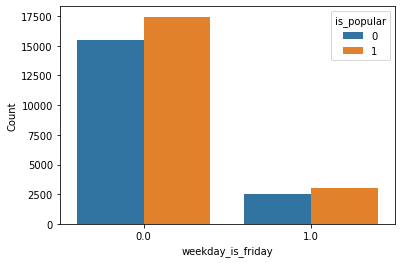

observed data:
 is_popular             0      1
weekday_is_friday              
0.0                15486  17438
1.0                 2513   3025
expected data:
 [[15407.39108731 17516.60891269]
 [ 2591.60891269  2946.39108731]]
chi-squared value: 5.2355 for 1 dof; p-value = 0.0221



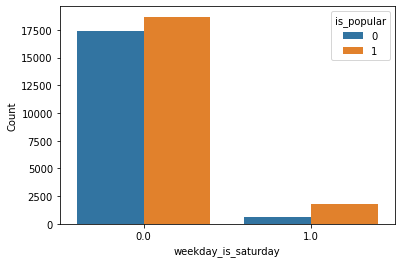

observed data:
 is_popular               0      1
weekday_is_saturday              
0.0                  17403  18690
1.0                    596   1773
expected data:
 [[16890.38289741 19202.61710259]
 [ 1108.61710259  1260.38289741]]
chi-squared value: 474.7621 for 1 dof; p-value = 0.0000



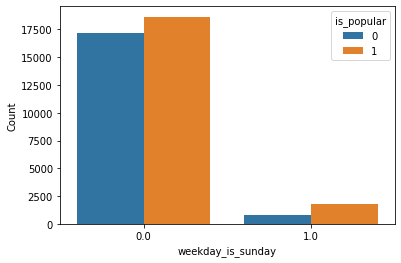

observed data:
 is_popular             0      1
weekday_is_sunday              
0.0                17167  18638
1.0                  832   1825
expected data:
 [[16755.6080027 19049.3919973]
 [ 1243.3919973  1413.6080027]]
chi-squared value: 274.8238 for 1 dof; p-value = 0.0000



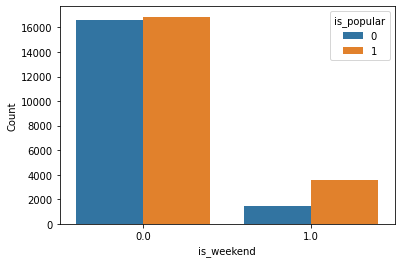

observed data:
 is_popular      0      1
is_weekend              
0.0         16571  16865
1.0          1428   3598
expected data:
 [[15646.99090011 17789.00909989]
 [ 2352.00909989  2673.99090011]]
chi-squared value: 784.8625 for 1 dof; p-value = 0.0000



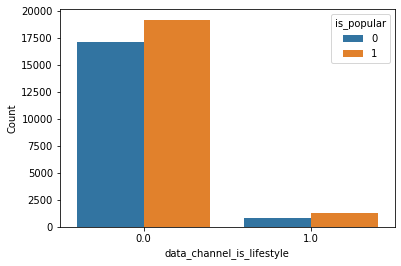

observed data:
 is_popular                     0      1
data_channel_is_lifestyle              
0.0                        17184  19201
1.0                          815   1262
expected data:
 [[17027.02966564 19357.97033436]
 [  971.97033436  1105.02966564]]
chi-squared value: 50.3679 for 1 dof; p-value = 0.0000



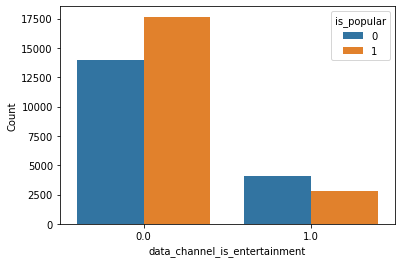

observed data:
 is_popular                         0      1
data_channel_is_entertainment              
0.0                            13954  17653
1.0                             4045   2810
expected data:
 [[14791.07672508 16815.92327492]
 [ 3207.92327492  3647.07672508]]
chi-squared value: 499.5946 for 1 dof; p-value = 0.0000



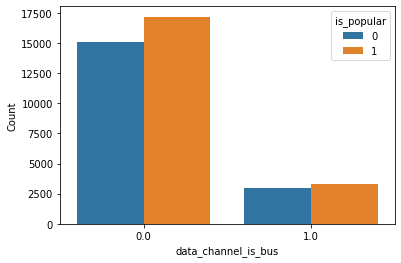

observed data:
 is_popular               0      1
data_channel_is_bus              
0.0                  15061  17166
1.0                   2938   3297
expected data:
 [[15081.21712339 17145.78287661]
 [ 2917.78287661  3317.21712339]]
chi-squared value: 0.3142 for 1 dof; p-value = 0.5751



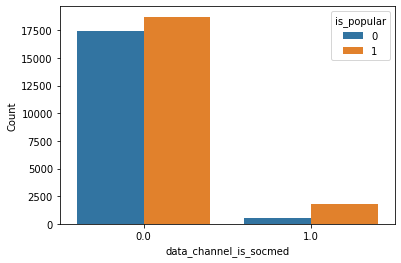

observed data:
 is_popular                  0      1
data_channel_is_socmed              
0.0                     17441  18710
1.0                       558   1753
expected data:
 [[16917.5250637 19233.4749363]
 [ 1081.4749363  1229.5250637]]
chi-squared value: 506.6983 for 1 dof; p-value = 0.0000



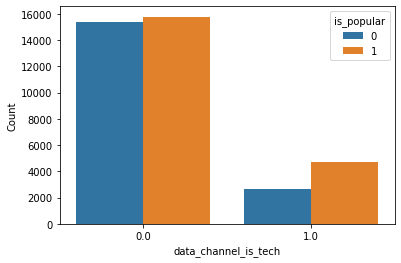

observed data:
 is_popular                0      1
data_channel_is_tech              
0.0                   15366  15771
1.0                    2633   4692
expected data:
 [[14571.13158442 16565.86841558]
 [ 3427.86841558  3897.13158442]]
chi-squared value: 427.9411 for 1 dof; p-value = 0.0000



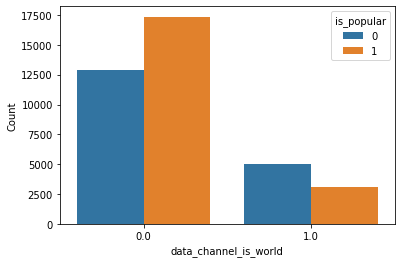

observed data:
 is_popular                 0      1
data_channel_is_world              
0.0                    12939  17355
1.0                     5060   3108
expected data:
 [[14176.63423639 16117.36576361]
 [ 3822.36576361  4345.63423639]]
chi-squared value: 956.2913 for 1 dof; p-value = 0.0000



In [ ]:
# listing all categorical variables
cat_cols = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

# for every category column, doing the Chi-sq test
for cat_var in cat_cols:
  get_chi_sq(cat_var, 'is_popular', data_normal)

In [ ]:
# We are dropping the weekday is saturday and sunday columns since they are same as is_weekend column
data_normal.drop(['weekday_is_saturday'], axis=1, inplace=True)
data_normal.drop(['weekday_is_sunday'], axis=1, inplace=True)

In [ ]:
data_normal.shape

(38462, 51)

In [ ]:
data_normal.isnull().values.any()

False

In [ ]:
# Splitting the dataset 70% training and 30% test

X = data_normal.drop(['is_popular'], axis=1)
y = data_normal['is_popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape

(26923, 50)

In [ ]:
X_test.shape

(11539, 50)

In [ ]:
X_train.reset_index(drop=True)

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,2.079442,6.749931,-0.713867,3.044522,1.098612,0.000000,0.000000,1.504077,2.302585,-1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.302585,6.458338,-0.830070,2.079442,1.386294,2.564949,0.000000,1.486508,2.079442,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.079442,3.891820,-0.202941,1.098612,1.098612,0.000000,0.693147,1.474156,1.609438,-1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.484907,5.988961,-0.654532,2.639057,0.693147,0.000000,0.000000,1.574239,2.079442,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.397895,5.973810,-0.557709,1.609438,1.386294,0.000000,0.000000,1.544255,2.302585,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26918,2.397895,7.003974,-0.840038,2.708050,0.000000,0.000000,0.000000,1.571111,2.302585,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26919,2.484907,5.662960,-0.528525,1.609438,0.693147,0.000000,0.000000,1.477493,1.791759,5.379897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26920,2.302585,5.940171,-0.621688,0.693147,0.000000,0.000000,0.000000,1.550358,1.386294,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26921,2.197225,5.043425,-0.471347,1.098612,0.000000,0.000000,0.000000,1.589893,1.945910,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test.reset_index(drop=True)

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,2.397895,7.413970,-1.070749,2.639057,1.791759,0.000000,0.000000,1.487669,2.197225,1.386294,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.484907,6.315358,-0.652398,1.098612,0.693147,0.000000,0.000000,1.530841,1.609438,1.386294,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.197225,6.230481,-0.585764,1.791759,0.693147,0.000000,0.000000,1.514521,2.302585,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.302585,4.969813,-0.346523,1.386294,1.098612,0.000000,0.000000,1.461518,2.197225,5.379897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.302585,6.609349,-0.804132,2.197225,1.098612,0.000000,1.386294,1.456230,2.302585,-1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11534,2.564949,6.650279,-0.699792,2.772589,0.000000,0.693147,0.693147,1.588258,1.609438,-1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11535,2.564949,7.410952,-0.813712,3.784190,2.995732,1.609438,2.079442,1.533859,2.079442,-1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11536,2.302585,5.056246,-0.386047,1.386294,1.386294,0.000000,0.000000,1.558480,1.609438,1.386294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11537,2.197225,5.438079,-0.434517,1.945910,0.000000,0.693147,0.000000,1.619819,1.945910,-1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_train.reset_index(drop=True)

0        0
1        1
2        0
3        0
4        1
        ..
26918    1
26919    0
26920    0
26921    1
26922    1
Name: is_popular, Length: 26923, dtype: int64

In [ ]:
y_test.reset_index(drop=True)

0        1
1        1
2        1
3        1
4        1
        ..
11534    0
11535    0
11536    1
11537    1
11538    0
Name: is_popular, Length: 11539, dtype: int64

## Models

*   Baseline Model - Naive Bayes
*   Logistic Regression




In [ ]:
# Function to train and predict the models
# input: model, sample size, training data and test data
# output: accuracy, F1 score and auc values for the different models along with confusion matrix, ROC curves and PR curves
def model_results(model, sample_size, X_train, y_train, X_test, y_test): 
    output = {}
    model.fit(X_train[:sample_size], y_train[:sample_size])
    
    #Get predictions
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
            
    #Accuracy on the training samples
    output['acc_train'] = accuracy_score(y_train, predictions_train)
        
    #Accuracy on test set
    output['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #F-score on the the training samples
    output['f_train'] = fbeta_score(y_train, predictions_train, beta=1)
        
    #F-score on the test set
    output['f_test'] = fbeta_score(y_test, predictions_test, beta=1)
    
    #AUC on the the training samples
    output['auc_train'] = roc_auc_score(y_train,predictions_train)
        
    #AUC on the test set
    output['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    
    print ("{} trained on {} samples.".format(model.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(model.__class__.__name__,\
          output['acc_test'],output['f_test'], output['auc_test']) )
    
    # Confusion Matrix
    print("Confusion Matrix :")
    print("\n")
    cm = confusion_matrix(y_test, predictions_test)
    data_cm = pd.DataFrame(cm, range(2), range(2))
    plt.figure(figsize=(7,5))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(data_cm, annot=True, annot_kws={"size": 14},fmt='g') # font size

    # AUC Curve
    auc = metrics.roc_auc_score(y_test, predictions_test)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_test,pos_label = 1.0)
    plt.figure(figsize=(5,4), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("AUC & ROC Curve", fontsize=12)
    plt.plot(false_positive_rate, true_positive_rate, 'c')
    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='dimgrey')
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.show()


    #PR Curve
    from sklearn.metrics import precision_recall_curve
    y_score = model.predict_proba(X_test)[:, 1]
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')
    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    
    plt.show()
    return results

### Logistic Regression - experimenting with different values of C

In [ ]:
# Dividing the training data into validation and train datasets
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

C : float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [ ]:
# Cross validation to get the optimum value of C for Logistic Regression
results= pd.DataFrame()
c_range = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ,0.8, 0.9, 1.0]
for i, c in enumerate(c_range):
  model = LogisticRegression(random_state=100, C=c)
  model.fit(X_train_val, y_train_val)
  # Get predictions on the  training samples
  predictions_test = model.predict(X_test_val)
  #predictions_train = model.predict(X_train_val)
  
  results.at[i, 'C'] = c
  results.at[i, 'accuracy'] = accuracy_score(y_test_val, predictions_test)
  results.at[i, 'auc_test'] = roc_auc_score(y_test_val,predictions_test)
  results.at[i, 'f_test'] = fbeta_score(y_test_val, predictions_test, beta=1)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
results

,C,accuracy,auc_test,f_test
0,0.001,0.640213,0.633704,0.685021
1,0.010,0.658041,0.653786,0.691466
2,0.100,0.659527,0.655930,0.689966
3,0.200,0.656060,0.652529,0.686456
4,0.300,0.656184,0.652645,0.686604
5,0.400,0.658041,0.654295,0.689244
6,0.500,0.655689,0.652148,0.686153
7,0.600,0.656432,0.652910,0.686759
8,0.700,0.657051,0.653635,0.686864
9,0.800,0.658413,0.654978,0.688213


The accuracy is almost the same when cross validated with different values of C.

GaussianNB trained on 269 samples.
GaussianNB with accuracy 0.6179911604125141, F1 0.6387477462711031 and AUC 0.6169855696238299.
Confusion Matrix :




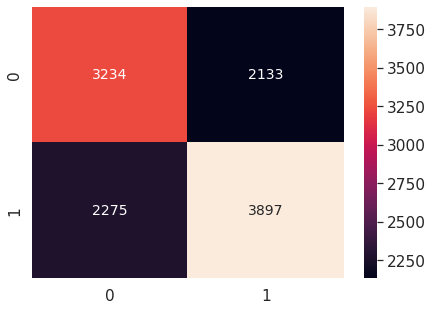

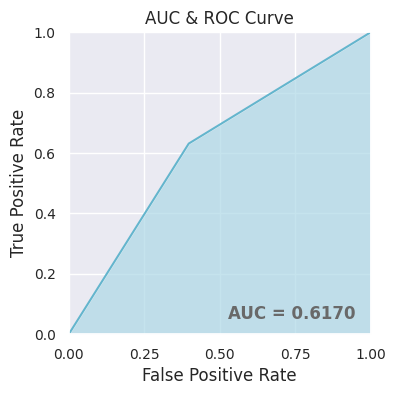

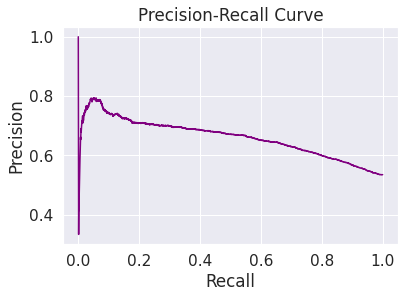

GaussianNB trained on 2692 samples.
GaussianNB with accuracy 0.6266574226536095, F1 0.6251305255830142 and AUC 0.6300077850274612.
Confusion Matrix :




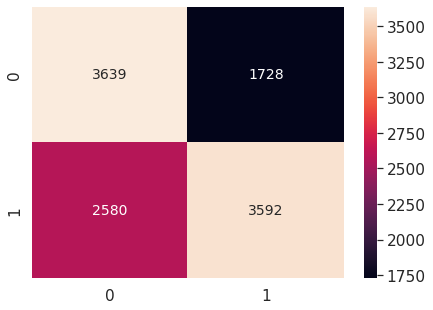

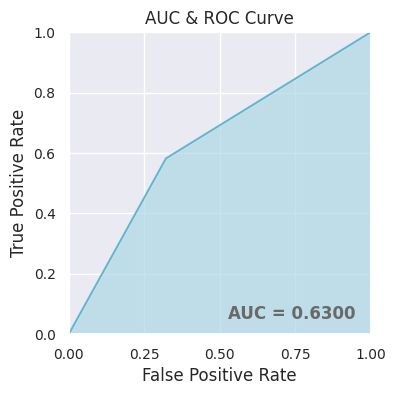

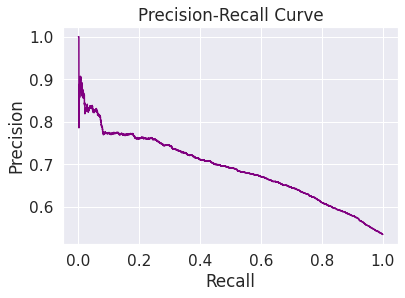

GaussianNB trained on 26923 samples.
GaussianNB with accuracy 0.6362769737412254, F1 0.6516145098364738 and AUC 0.636302508633628.
Confusion Matrix :




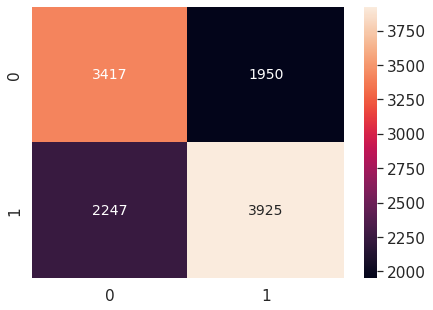

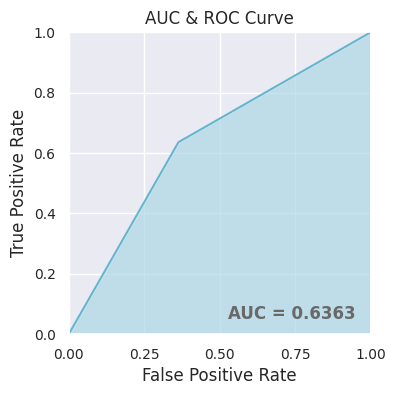

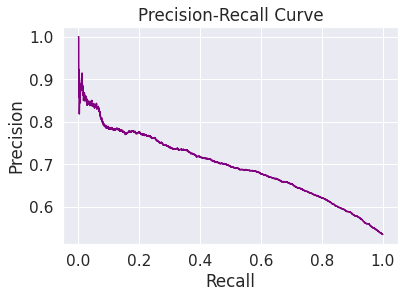

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression trained on 269 samples.
LogisticRegression with accuracy 0.6047317791836381, F1 0.6273388348721302 and AUC 0.6034365486450708.
Confusion Matrix :




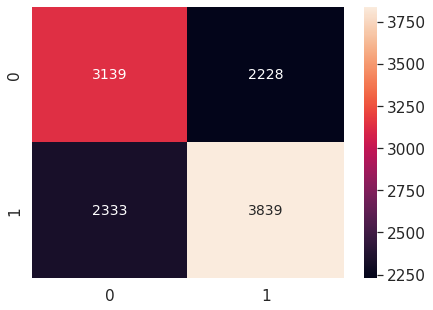

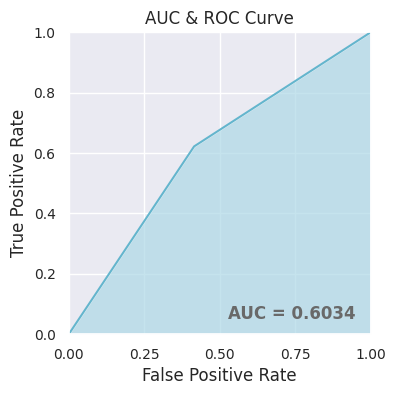

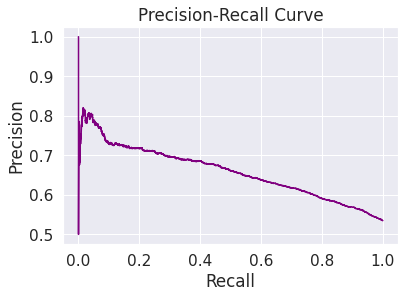

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression trained on 2692 samples.
LogisticRegression with accuracy 0.6444232602478551, F1 0.6699911525778172 and AUC 0.642143513183528.
Confusion Matrix :




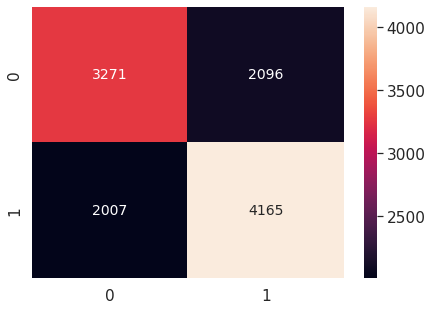

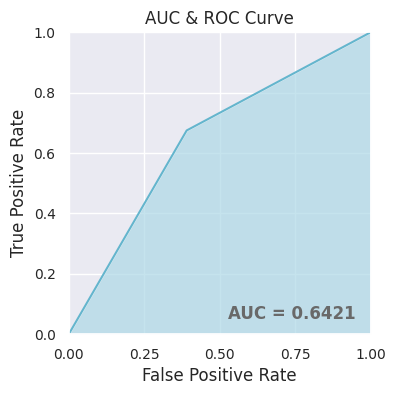

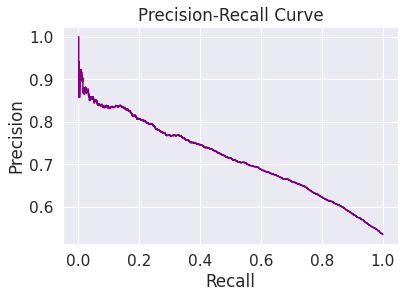

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression trained on 26923 samples.
LogisticRegression with accuracy 0.6566426900077996, F1 0.6867488931056294 and AUC 0.6531164834281074.
Confusion Matrix :




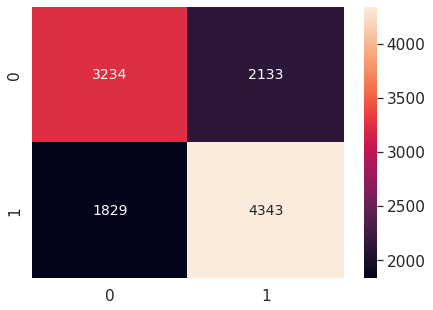

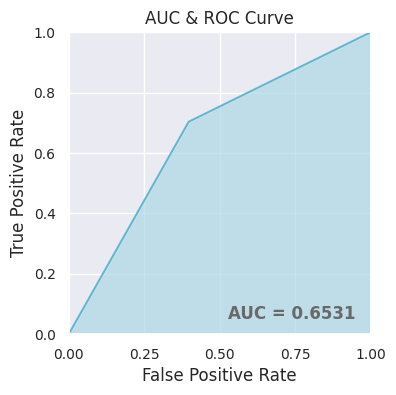

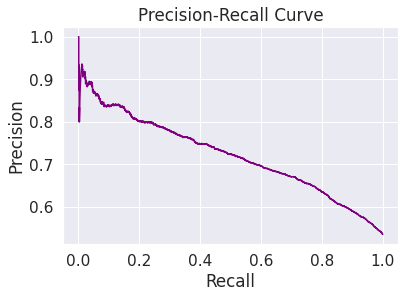

In [ ]:
# Naive Bayes - Baseline Model
# Logistic Regression

# Model initialization
model_A = GaussianNB()
model_B = LogisticRegression(random_state=100, C=0.100)

# Sampling the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Predict and results of different models
results = {}
for model in [model_A, model_B]:
    clf_name = model.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if model == model_A:
            results[clf_name][i] = \
            model_results(model, samples, X_train, y_train, X_test, y_test)
        elif model == model_B:
            results[clf_name][i] = \
            model_results(model, samples, X_train, y_train, X_test, y_test)  
        else:
            results[clf_name][i] = \
            model_results(clf, samples, X_train, y_train, X_test, y_test)

> **Naive Bayes Model**
*   Accuracy = 0.64
*   AUC = 0.64
*   F1 score = 0.65

> **Logistic Regression Model**
*   Accuracy = 0.66
*   AUC = 0.65
*   F1 score = 0.68


## K Nearest Neighbour (KNN)

In [ ]:
# For finding best k value for KNN
k_range = range(2, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f" 
      % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 9} with a score of 0.62


KNeighborsClassifier trained on 269 samples.
KNeighborsClassifier with accuracy 0.5658202617211197, F1 0.6173235563703026 and AUC 0.5591523672484969.
Confusion Matrix :




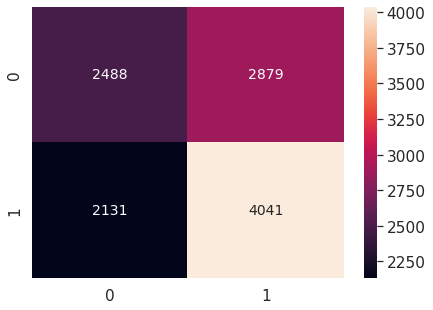

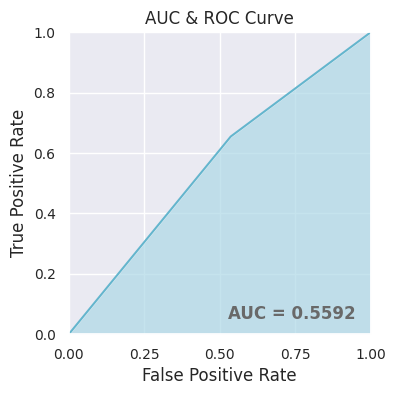

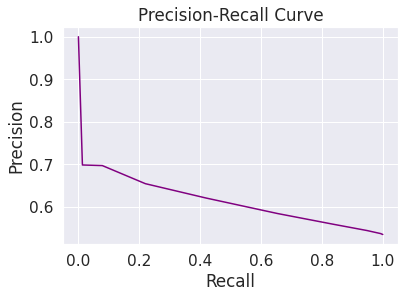

KNeighborsClassifier trained on 2692 samples.
KNeighborsClassifier with accuracy 0.5903457838634197, F1 0.6076852850858994 and AUC 0.5901345305152669.
Confusion Matrix :




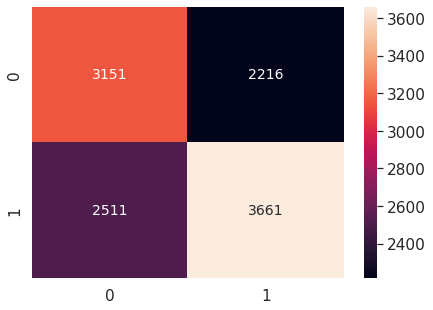

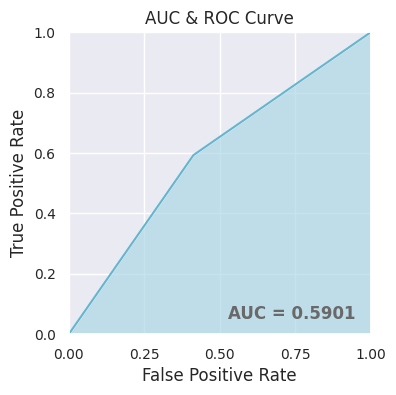

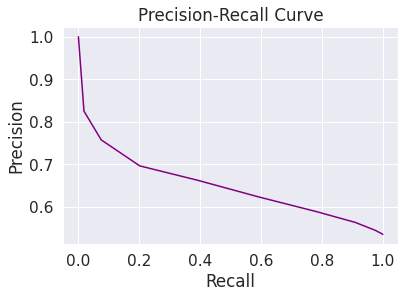

KNeighborsClassifier trained on 26923 samples.
KNeighborsClassifier with accuracy 0.6188577866366236, F1 0.6405100539480137 and AUC 0.617662019921797.
Confusion Matrix :




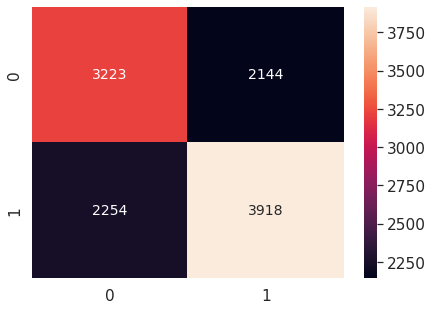

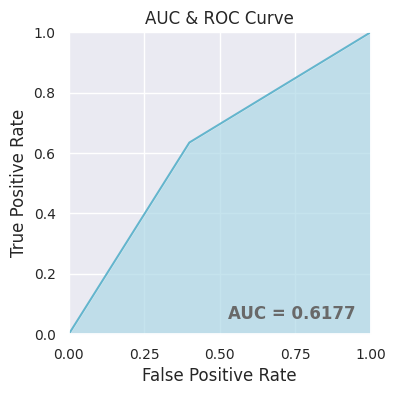

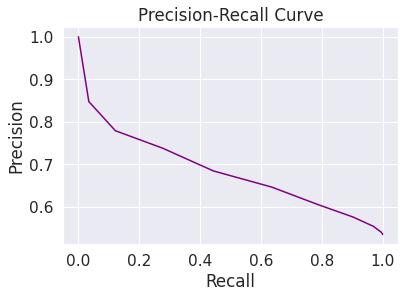

In [ ]:
# KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=9)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
clf_name = knn_clf.__class__.__name__
results[clf_name] = {}
for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results[clf_name][i] = model_results(knn_clf, samples, X_train, y_train, X_test, y_test)


> **KNN**
*   Accuracy = 0.62
*   AUC = 0.62
*   F1 score = 0.64


## Soft-Margin SVM Model

In [ ]:
# Normalizing the features
def get_normalized_vec(x_train,x_test):
  norm_X_train = normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)
  norm_X_test = normalize(x_test, norm='l2', axis=1, copy=True, return_norm=False)
  return norm_X_train,norm_X_test

In [ ]:
# Normalize the feature vectors
X_train_dense_norm, X_test_dense_norm = get_normalized_vec(X_train,X_test)

In [ ]:
# Define the function for soft-margin linear classifiers
def smc_function(vx_train, vx_test, vy_train, vy_test, slack):
  model = svm.SVC(kernel='rbf', C=slack) 
  model.fit(vx_train, vy_train)
  train_err = (1 - model.score(vx_train, vy_train))
  test_err = (1 - model.score(vx_test, vy_test))
  #yhat = model.predict(vx_test)
  return train_err, test_err #, yhat

In [ ]:
def smc_cv(x_train, x_test, y_train, y_test):
  smc_train_err = {}
  smc_test_err = {}
  #smc_yhat = {}
  c = 0.0125
  while c < 12.8:
    smc_train, smc_test = smc_function(x_train, x_test, y_train, y_test, c)    
    smc_train_err.update({c:smc_train})
    smc_test_err.update({c:smc_test})
    #smc_yhat.update({c:smc_pred})
    c = c + c
  return smc_train_err, smc_test_err #, smc_yhat

In [ ]:
smc_train_err, smc_test_err= smc_cv(X_train_dense_norm, X_test_dense_norm, y_train, y_test)

In [ ]:
# Picking the C value 
c_vals = np.array([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4])
print("Training Errors:")
for c in c_vals:
  print('Train error at C =',c,':',smc_train_err[c])

print("Test Errors:")
for c in c_vals:
  print('Train error at C =',c,':',smc_test_err[c])


Training Errors:
Train error at C = 0.0125 : 0.451509861456747
Train error at C = 0.025 : 0.3991754262155035
Train error at C = 0.05 : 0.38078965939902687
Train error at C = 0.1 : 0.3738810682316235
Train error at C = 0.2 : 0.36459532741522116
Train error at C = 0.4 : 0.3541210117743193
Train error at C = 0.8 : 0.34524384355383875
Train error at C = 1.6 : 0.33978382795379414
Train error at C = 3.2 : 0.3367381049660142
Train error at C = 6.4 : 0.33138951825576646
Test Errors:
Train error at C = 0.0125 : 0.44951902244561925
Train error at C = 0.025 : 0.397088135886992
Train error at C = 0.05 : 0.37498916717219866
Train error at C = 0.1 : 0.36788283213450035
Train error at C = 0.2 : 0.3609498223416241
Train error at C = 0.4 : 0.3503769824074876
Train error at C = 0.8 : 0.34405061097148804
Train error at C = 1.6 : 0.3424040211456799
Train error at C = 3.2 : 0.33911084149406356
Train error at C = 6.4 : 0.33599098708726927


In [ ]:
# SVM RBF 
from sklearn.model_selection import cross_val_score

svmrbf = svm.SVC(kernel = 'rbf' , C=6.4, probability=True)
svmrbf.fit(X_train, y_train)

#cross validation accuracy
scores = cross_val_score(svmrbf, X_train, y_train, cv=5)
svm_rbf_trainacc = scores.mean()
svm_rbf_testacc = svmrbf.score(X_test, y_test)

svmrbf_y_test_Pred = svmrbf.predict(X_test)
svmrbf_F1_score = fbeta_score(y_test.values, svmrbf_y_test_Pred, beta=1)

print("--------SVM RBF kernel --------")
print("train accuracy is: ", svm_rbf_trainacc)
print("test accuracy is: ", svm_rbf_testacc)
print("F1 score is: ", svmrbf_F1_score)
confusion_matrix(y_test, svmrbf_y_test_Pred)

In [ ]:
svm_result['predictions'] = svmrbf_y_test_Pred.tolist()

In [ ]:
min_test = data[data['shares'] == min(data['shares'])]

In [ ]:
data[data['url'] == 'http://mashable.com/2014/12/10/mad-max-trailer/']

In [ ]:
max_test = data[data['shares'] == max(data['shares'])]

In [ ]:
svm_result.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'data_channel_is_lifestyle',
       '

In [ ]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

In [ ]:
min_test = min_test[features]

In [ ]:
min_test.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'data_channel_is_lifestyle',
       '

In [ ]:
# get the prediction
print(svmrbf.predict(min_test))

[1]


In [ ]:
max_test = max_test[features]
max_test.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'data_channel_is_lifestyle',
       '

In [ ]:
print(svmrbf.predict(max_test))

[1]


Accuracy :  0.6662622410954155
AUC :  0.6630443255095437
Confusion Matrix :




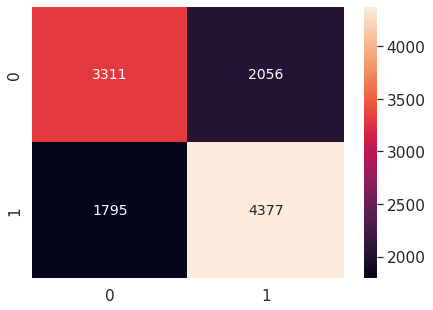

In [ ]:
#Accuracy and AUC
test_accuracy = accuracy_score(y_test, svmrbf_y_test_Pred)
AUC_Test = roc_auc_score(y_test,svmrbf_y_test_Pred)
print("Accuracy : ", test_accuracy)   
print("AUC : ", AUC_Test)   

# Confusion Matrix
print("Confusion Matrix :")
print("\n")
cm = confusion_matrix(y_test, svmrbf_y_test_Pred)
data_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4) # for label size
sns.heatmap(data_cm, annot=True, annot_kws={"size": 14},fmt='g') # font size

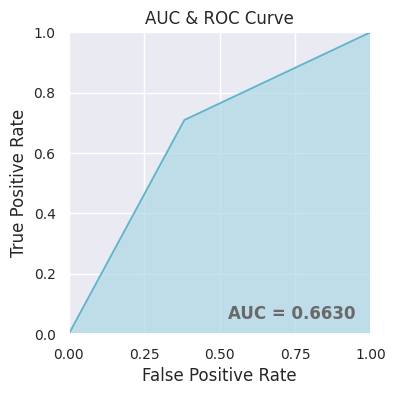

In [ ]:
#AUC Curve
auc = metrics.roc_auc_score(y_test,svmrbf_y_test_Pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, svmrbf_y_test_Pred,pos_label = 1.0)
plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("AUC & ROC Curve", fontsize=12)
plt.plot(false_positive_rate, true_positive_rate, 'c')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='dimgrey')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)

plt.show()

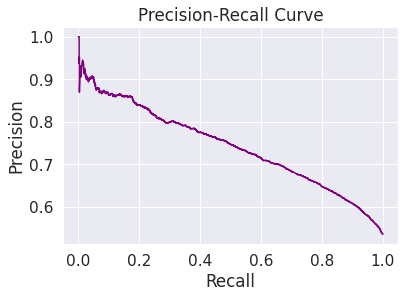

In [ ]:
#PR curve

y_score = svmrbf.predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
# SVM poly kernel
from sklearn.model_selection import cross_val_score
svml = svm.SVC(kernel='poly',C=6.4,  max_iter=2000)
svml.fit(X_train, y_train)

#cross validation accuracy
scores = cross_val_score(svml, X_train, y_train, cv=5)
svml_trainacc = scores.mean()
svml_testacc = svml.score(X_test, y_test)

svml_y_test_Pred = svml.predict(X_test)
svml_F1_score = fbeta_score(y_test, svml_y_test_Pred, beta=1)

print("--------SVM poly kernel --------")
print("train accuracy is: ", svml_trainacc)
print("test accuracy is: ", svml_testacc)
print("F1 score is: ", svml_F1_score)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2

--------SVM poly kernel --------
train accuracy is:  0.5306986621524488
test accuracy is:  0.5347950428979981
F1 score is:  0.6968944099378883


> **SVM**
*   Accuracy = 0.6662
*   AUC = 0.6630
*   F1 score = 0.6947


## Unsupervised Model

In [ ]:
data_normal.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'data_channel_is_lifestyle',
       '

In [ ]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

data_normal_copy = data_normal.copy()
data_normal_copy.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'max_positive_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'is_weekend', 'data_channel_is_lifestyle',
       '

In [ ]:
y = data_normal_copy.pop('is_popular')
X = data_normal_copy.loc[:, features]

In [ ]:
from sklearn.preprocessing import StandardScaler
# Fit and transform on datset
X_StandScaler = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_PCA = pca.fit_transform(X_StandScaler)

# Convert to dataframe
components = [f"PC{i+1}" for i in range(X_PCA.shape[1])]
X_PCA = pd.DataFrame(X_PCA, columns=components)

X_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,21.667304,3.988595,-0.781331,-5.108565,9.678278,-5.721772,12.019099,3.831661,-1.427720,1.932294,...,0.776560,-0.046866,0.303774,-0.348435,0.857364,0.032232,0.223566,-0.597772,0.081557,-3.709969e-16
1,23.712626,3.351854,0.030993,-2.486441,6.960652,-6.658439,11.334670,1.695473,-0.781263,2.831905,...,-0.171414,0.266693,0.166362,0.003291,0.856601,0.210954,0.253316,-0.326291,0.086380,6.995276e-15
2,22.250470,5.794675,-1.119095,-4.700906,6.902664,-5.410656,11.680711,2.382115,-1.224722,2.401629,...,-0.015337,0.076362,0.755348,0.078839,0.750005,-0.125404,0.348528,-0.434414,0.111586,-2.298497e-15
3,22.633246,4.009938,1.593791,-5.611023,9.241010,-6.795299,9.907369,2.792199,-3.366245,1.624114,...,-0.118237,-0.046705,0.289218,-0.476811,0.668139,0.034769,0.365902,-0.642285,0.119025,5.455991e-15
4,20.888735,9.625212,1.662730,-5.184678,9.671558,-0.988058,12.503398,2.407317,-1.625876,3.287781,...,-0.491755,0.373170,0.097276,-0.082865,0.687815,-0.150361,0.507374,-0.602079,0.096697,-4.784250e-15


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=components,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
n_tokens_title,-0.055068,-0.038633,0.045423,0.039378,0.159926,0.096449,0.035406,0.093609,-0.027133,-0.220157,...,-0.018418,-0.006535,-0.003415,0.008056,0.006050,0.000327,-0.004320,0.008243,0.000664,6.648657e-18
n_tokens_content,-0.059791,0.322182,0.366089,0.090603,0.045724,-0.096241,0.002713,-0.065801,-0.021333,-0.097986,...,0.029715,-0.030206,-0.730658,-0.253190,0.035345,-0.095374,-0.081558,0.010699,-0.002180,1.689202e-16
n_unique_tokens,0.046819,-0.304335,-0.331249,-0.067498,-0.009776,0.034857,-0.026285,0.067623,0.008210,0.101749,...,-0.001506,0.026088,-0.541458,-0.126284,0.016926,-0.085061,-0.064458,0.009803,-0.001830,1.332502e-16
num_hrefs,-0.125543,0.239198,0.199621,-0.018019,-0.011619,-0.056084,-0.046712,0.016536,0.086301,0.273042,...,-0.028253,0.015606,0.078189,0.056487,-0.015714,0.002457,0.011576,-0.017569,-0.001543,-6.082325e-17
num_self_hrefs,-0.122833,0.212756,0.051196,-0.142733,0.003435,0.105980,0.269047,0.014744,0.166878,0.087577,...,0.007898,-0.006644,0.025167,-0.011965,0.021389,0.003653,-0.147333,-0.047124,-0.003077,5.718769e-17
num_imgs,-0.172235,0.190949,0.110018,-0.166478,0.063616,0.007683,0.015449,0.036065,0.003019,0.119765,...,-0.006817,-0.009784,-0.038739,0.042720,-0.002461,0.001936,-0.011455,-0.021990,-0.001449,-7.897717e-17
num_videos,-0.116735,0.029796,-0.021926,-0.063282,0.141833,-0.125766,0.004468,-0.002220,0.003145,0.014373,...,-0.004444,0.008413,0.053542,0.047133,0.010757,0.017588,-0.017317,0.006953,-0.000562,-7.234423e-18
average_token_length,0.026693,-0.105050,0.138147,0.075822,-0.077798,-0.016520,-0.077177,0.167139,0.081952,0.301443,...,-0.002364,-0.008791,0.003465,0.005490,-0.002368,0.007016,0.000720,0.000866,-0.001267,3.809555e-17
num_keywords,0.020510,0.154009,0.034518,-0.190980,-0.038041,0.167383,-0.321337,0.017682,0.132829,0.066984,...,0.050934,-0.218245,-0.001746,-0.049902,-0.101793,-0.002725,0.020800,-0.050629,0.024276,-2.567405e-17
kw_min_min,0.219943,0.090098,-0.163518,-0.090516,0.064302,-0.111355,-0.062026,-0.090548,0.025824,0.277189,...,0.033947,-0.100813,-0.023028,0.022740,0.034744,0.004560,0.054109,-0.069812,0.005112,-1.106476e-16


In [ ]:
pca.get_covariance()

array([[ 1.000026  ,  0.03206388, -0.0257891 , ..., -0.0936788 ,
        -0.04441242,  0.05483948],
       [ 0.03206388,  1.000026  , -0.86739935, ...,  0.00763513,
         0.00436208,  0.124606  ],
       [-0.0257891 , -0.86739935,  1.000026  , ..., -0.02820887,
        -0.06934652, -0.08449573],
       ...,
       [-0.0936788 ,  0.00763513, -0.02820887, ...,  1.000026  ,
        -0.12263559, -0.1312897 ],
       [-0.04441242,  0.00436208, -0.06934652, ..., -0.12263559,
         1.000026  , -0.25185831],
       [ 0.05483948,  0.124606  , -0.08449573, ..., -0.1312897 ,
        -0.25185831,  1.000026  ]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([8.36361664e-02, 7.04744629e-02, 6.46476065e-02, 5.31371263e-02,
       5.16384722e-02, 4.68714312e-02, 4.37761002e-02, 3.82090130e-02,
       3.56541499e-02, 3.30800745e-02, 2.75078157e-02, 2.54125127e-02,
       2.46261770e-02, 2.45133670e-02, 2.44096855e-02, 2.35497121e-02,
       2.32759765e-02, 2.24821946e-02, 2.19239905e-02, 2.11593332e-02,
       1.98299039e-02, 1.84246052e-02, 1.80377257e-02, 1.70778922e-02,
       1.46037138e-02, 1.41402579e-02, 1.37954143e-02, 1.33205602e-02,
       1.29595150e-02, 1.07470553e-02, 1.03531585e-02, 9.65062317e-03,
       8.68501351e-03, 8.51757255e-03, 8.05387855e-03, 6.84396284e-03,
       5.87506480e-03, 5.51624341e-03, 5.04295893e-03, 4.94420411e-03,
       3.48487045e-03, 3.30911509e-03, 1.72642938e-03, 1.41633733e-03,
       9.81141564e-04, 9.18663970e-04, 8.09450390e-04, 7.34641529e-04,
       2.14658769e-04, 1.64943255e-32])

In [ ]:
print(f'Number of features: {len(features)}')

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')



Number of features: 50
Number of components: 50


In [ ]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)



Variances (Percentage):
[8.36361664e+00 7.04744629e+00 6.46476065e+00 5.31371263e+00
 5.16384722e+00 4.68714312e+00 4.37761002e+00 3.82090130e+00
 3.56541499e+00 3.30800745e+00 2.75078157e+00 2.54125127e+00
 2.46261770e+00 2.45133670e+00 2.44096855e+00 2.35497121e+00
 2.32759765e+00 2.24821946e+00 2.19239905e+00 2.11593332e+00
 1.98299039e+00 1.84246052e+00 1.80377257e+00 1.70778922e+00
 1.46037138e+00 1.41402579e+00 1.37954143e+00 1.33205602e+00
 1.29595150e+00 1.07470553e+00 1.03531585e+00 9.65062317e-01
 8.68501351e-01 8.51757255e-01 8.05387855e-01 6.84396284e-01
 5.87506480e-01 5.51624341e-01 5.04295893e-01 4.94420411e-01
 3.48487045e-01 3.30911509e-01 1.72642938e-01 1.41633733e-01
 9.81141564e-02 9.18663970e-02 8.09450390e-02 7.34641529e-02
 2.14658769e-02 1.64943255e-30]


Text(0, 0.5, 'Cumulative explained variance')

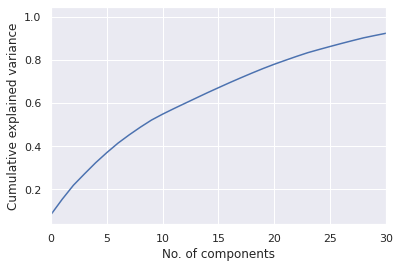

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_StandScaler)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,30,1)
plt.xlabel('No. of components')
plt.ylabel('Cumulative explained variance')

let’s print out the top 4 features that contributes the most to each of the 6 components:

In [ ]:
print('Top 4 most important features in each component')
print('===============================================')

pca_components = abs(pca.components_)

for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {data_normal_copy.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['kw_avg_avg', 'kw_avg_max', 'kw_max_avg', 'kw_max_max']
Component 1: ['n_tokens_content', 'n_unique_tokens', 'max_positive_polarity', 'rate_negative_words']
Component 2: ['n_tokens_content', 'data_channel_is_world', 'LDA_02', 'n_unique_tokens']
Component 3: ['LDA_00', 'data_channel_is_bus', 'abs_title_sentiment_polarity', 'title_sentiment_polarity']
Component 4: ['abs_title_sentiment_polarity', 'title_sentiment_polarity', 'data_channel_is_entertainment', 'abs_title_subjectivity']
Component 5: ['LDA_04', 'data_channel_is_tech', 'abs_title_sentiment_polarity', 'title_sentiment_polarity']
Component 6: ['self_reference_max_shares', 'kw_min_max', 'kw_max_avg', 'num_keywords']
Component 7: ['global_rate_negative_words', 'max_negative_polarity', 'rate_negative_words', 'LDA_04']
Component 8: ['kw_min_max', 'kw_min_avg', 'LDA_00', 'data_channel_is_bus']
Component 9: ['average_token_length', 'data_channel_is_entertainment', 'LDA_01', 

Let’s now apply PCA to find the desired number of components based on the desired explained variance, say 85%:

Cumulative Variances (Percentage):
[ 8.36361664 15.41106293 21.87582358 27.1895362  32.35338342 37.04052654
 41.41813656 45.23903786 48.80445285 52.1124603  54.86324187 57.40449314
 59.86711084 62.31844754 64.75941609 67.11438729 69.44198494 71.69020441
 73.88260345 75.99853677 77.98152716 79.82398768 81.62776025 83.33554947
 84.79592085 86.20994663]
Number of components: 26


Text(0, 0.5, 'Explained variance (%)')

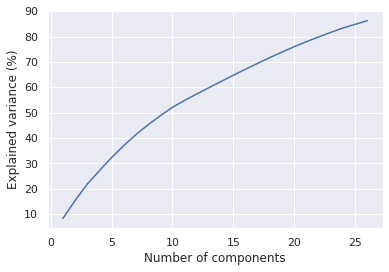

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_StandScaler)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance (%)")

In [ ]:
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')


Number of components: 26


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = 0.85)
_model = LogisticRegression(random_state=100, C=1.0)
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

# train the model using the PCA components
log_regress_model.fit(X_train,y_train)


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('pca', PCA(n_components=0.85)),
                ('regressor', LogisticRegression(random_state=100))])

In [ ]:
#And let’s score the model to see how it performs:

log_regress_model.score(X_test,y_test)
##And we now have the following accuracy:


0.6432966461565127